<a href="https://colab.research.google.com/github/ROKR7381/DEMO_PURPOSE/blob/main/Air_Quality_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as ms
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/air_quality.xlsx')

In [ ]:
df.head(50)

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Latitude,Longitude
0,01-01-2024 00:00,01-01-2024 01:00,117.46,191.41,11.95,5.10,17.05,NaN,NaN,2.15,20.14,28.728142,77.197058
1,01-01-2024 00:00,01-01-2024 01:00,140.50,185.00,2.22,19.62,12.25,28.82,6.97,1.10,17.43,28.798335,77.132482
2,01-01-2024 00:00,01-01-2024 01:00,190.00,266.00,17.72,61.20,47.03,29.50,25.85,1.35,15.28,28.564497,77.177255
3,01-01-2024 00:00,01-01-2024 01:00,212.50,309.50,9.62,64.43,74.08,32.32,8.15,0.90,8.05,28.698390,77.160810
4,01-01-2024 01:00,01-01-2024 02:00,100.28,168.99,12.89,5.40,18.30,NaN,NaN,2.13,16.86,28.728142,77.197058
5,01-01-2024 01:00,01-01-2024 02:00,143.75,196.00,2.30,18.42,11.70,30.78,6.72,1.10,21.20,28.798335,77.132482
6,01-01-2024 01:00,01-01-2024 02:00,191.00,283.00,14.15,62.95,45.03,34.02,27.30,1.27,19.40,28.564497,77.177255
7,01-01-2024 01:00,01-01-2024 02:00,201.75,288.50,7.40,65.58,72.98,30.77,8.67,0.97,5.50,28.698390,77.160810
8,01-01-2024 02:00,01-01-2024 03:00,118.77,198.40,13.50,5.65,19.15,NaN,NaN,2.15,19.38,28.728142,77.197058
9,01-01-2024 02:00,01-01-2024 03:00,141.25,190.00,3.40,19.40,13.10,29.30,5.40,1.00,21.85,28.798335,77.132482


In [ ]:
df.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'SO2', 'CO', 'Ozone', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df.shape

(5712, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  5712 non-null   object 
 1   To Date    5712 non-null   object 
 2   PM2.5      5619 non-null   float64
 3   PM10       5564 non-null   float64
 4   NO         5668 non-null   float64
 5   NO2        5611 non-null   float64
 6   NOx        5668 non-null   float64
 7   NH3        4231 non-null   float64
 8   SO2        4244 non-null   float64
 9   CO         5562 non-null   float64
 10  Ozone      5603 non-null   float64
 11  Latitude   5712 non-null   float64
 12  Longitude  5712 non-null   float64
dtypes: float64(11), object(2)
memory usage: 580.2+ KB


In [ ]:
#checking null value
df.isnull().sum()

From Date       0
To Date         0
PM2.5          93
PM10          148
NO             44
NO2           101
NOx            44
NH3          1481
SO2          1468
CO            150
Ozone         109
Latitude        0
Longitude       0
dtype: int64

In [ ]:
100*(df.isnull().sum()/len(df))

From Date     0.000000
To Date       0.000000
PM2.5         1.628151
PM10          2.591036
NO            0.770308
NO2           1.768207
NOx           0.770308
NH3          25.927871
SO2          25.700280
CO            2.626050
Ozone         1.908263
Latitude      0.000000
Longitude     0.000000
dtype: float64

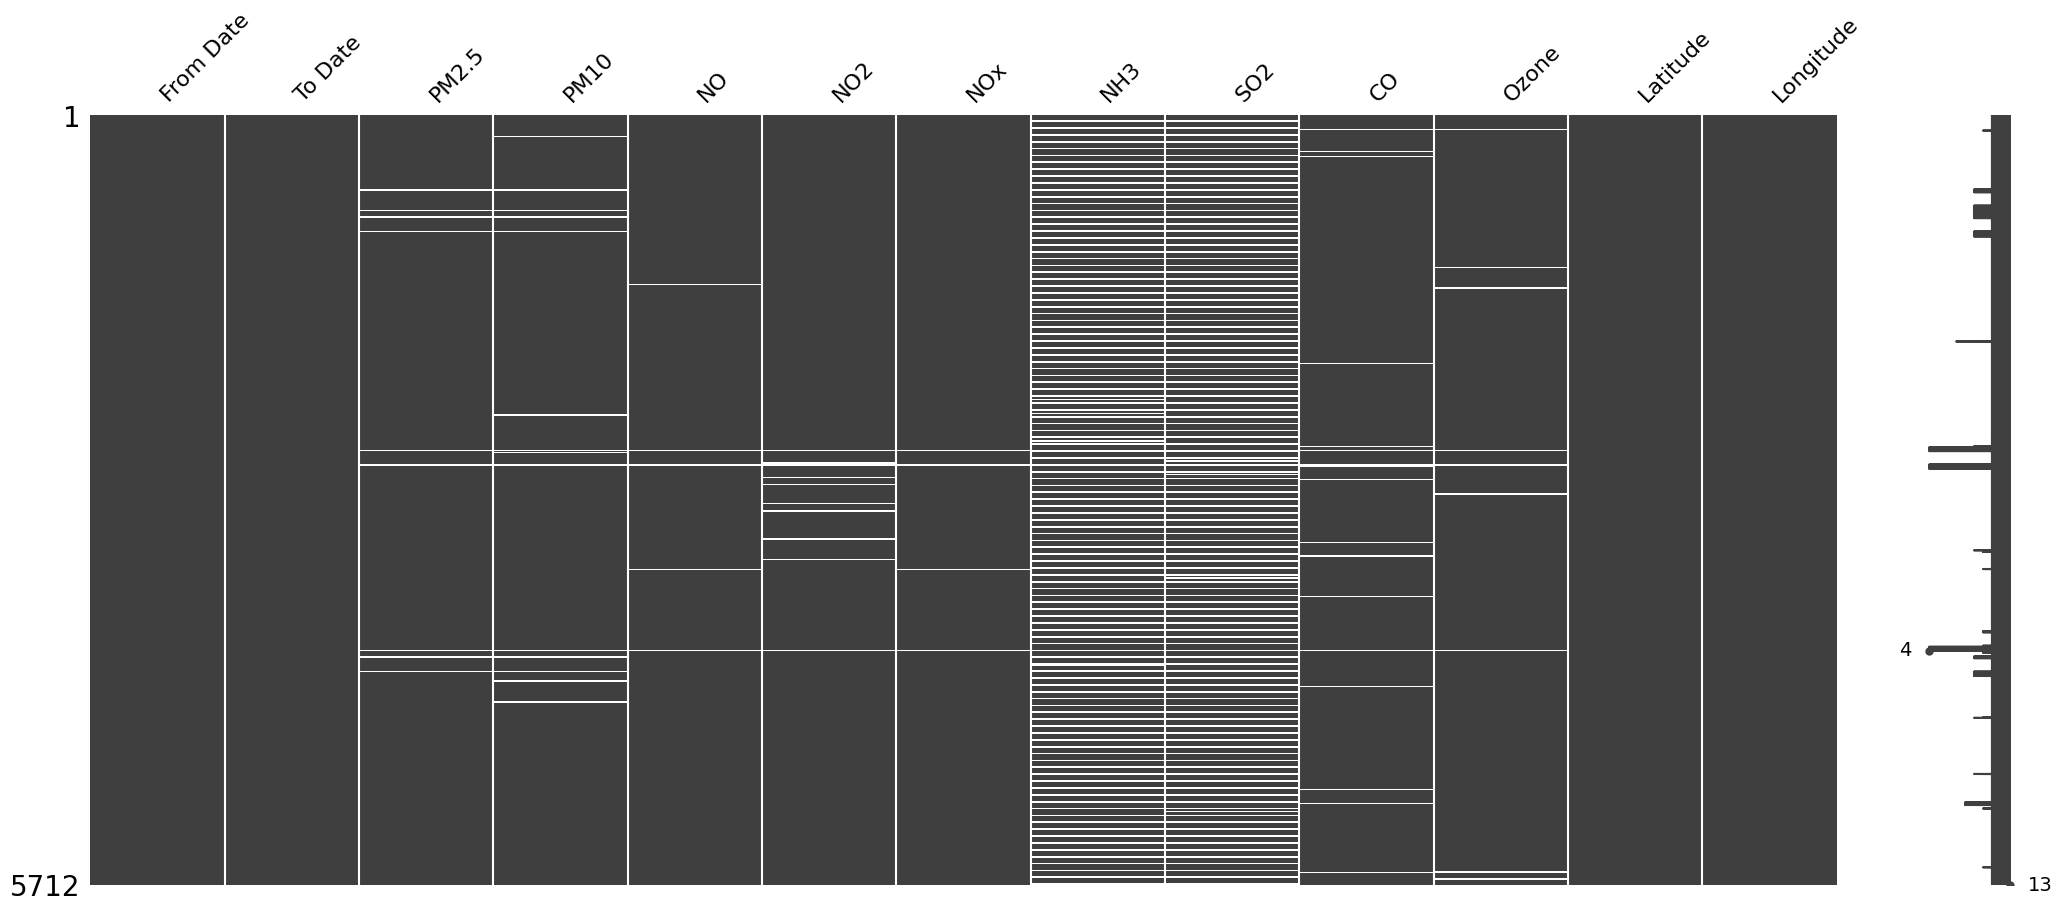

In [ ]:
#plotting missing number confirmation
ms.matrix(df);

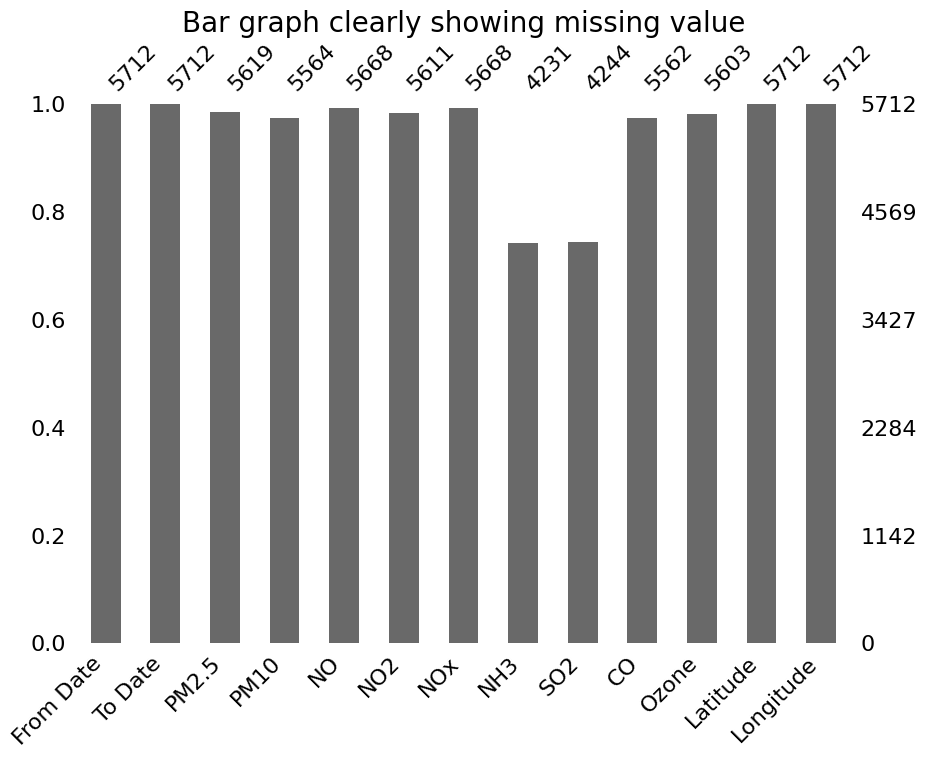

In [ ]:
ms.bar(df,figsize=(10,7))
plt.title("Bar graph clearly showing missing value",size=20);

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Latitude,Longitude
count,5619.000000,5564.000000,5668.000000,5611.000000,5668.000000,4231.000000,4244.000000,5562.000000,5603.000000,5712.000000,5712.000000
mean,162.707994,281.559358,30.179977,52.259266,53.567525,27.614621,16.562469,1.569369,29.790434,28.697341,77.166901
std,98.425674,138.938590,51.894342,58.148983,60.027181,14.745036,11.245552,0.994037,30.459957,0.084856,0.023658
min,2.000000,11.330000,0.100000,0.250000,0.000000,0.100000,0.200000,0.000000,0.600000,28.564497,77.132482
25%,90.750000,179.290000,5.465000,11.560000,17.100000,17.400000,7.630000,0.930000,9.600000,28.664917,77.153728
50%,146.500000,261.200000,12.700000,31.570000,31.210000,25.530000,14.720000,1.310000,21.000000,28.713266,77.169032
75%,213.350000,359.500000,27.282500,68.650000,64.670000,37.085000,21.707500,2.090000,35.285000,28.745691,77.182206
max,958.000000,996.000000,491.100000,453.730000,493.100000,194.970000,112.770000,9.580000,193.730000,28.798335,77.197058


In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
missing_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'SO2', 'CO', 'Ozone']

In [ ]:
df[missing_columns] = imputer.fit_transform(df[missing_columns])

In [ ]:
df.isnull().sum()

From Date    0
To Date      0
PM2.5        0
PM10         0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
CO           0
Ozone        0
Latitude     0
Longitude    0
dtype: int64

In [ ]:
df_features=df.drop(['From Date','To Date'],axis=1)

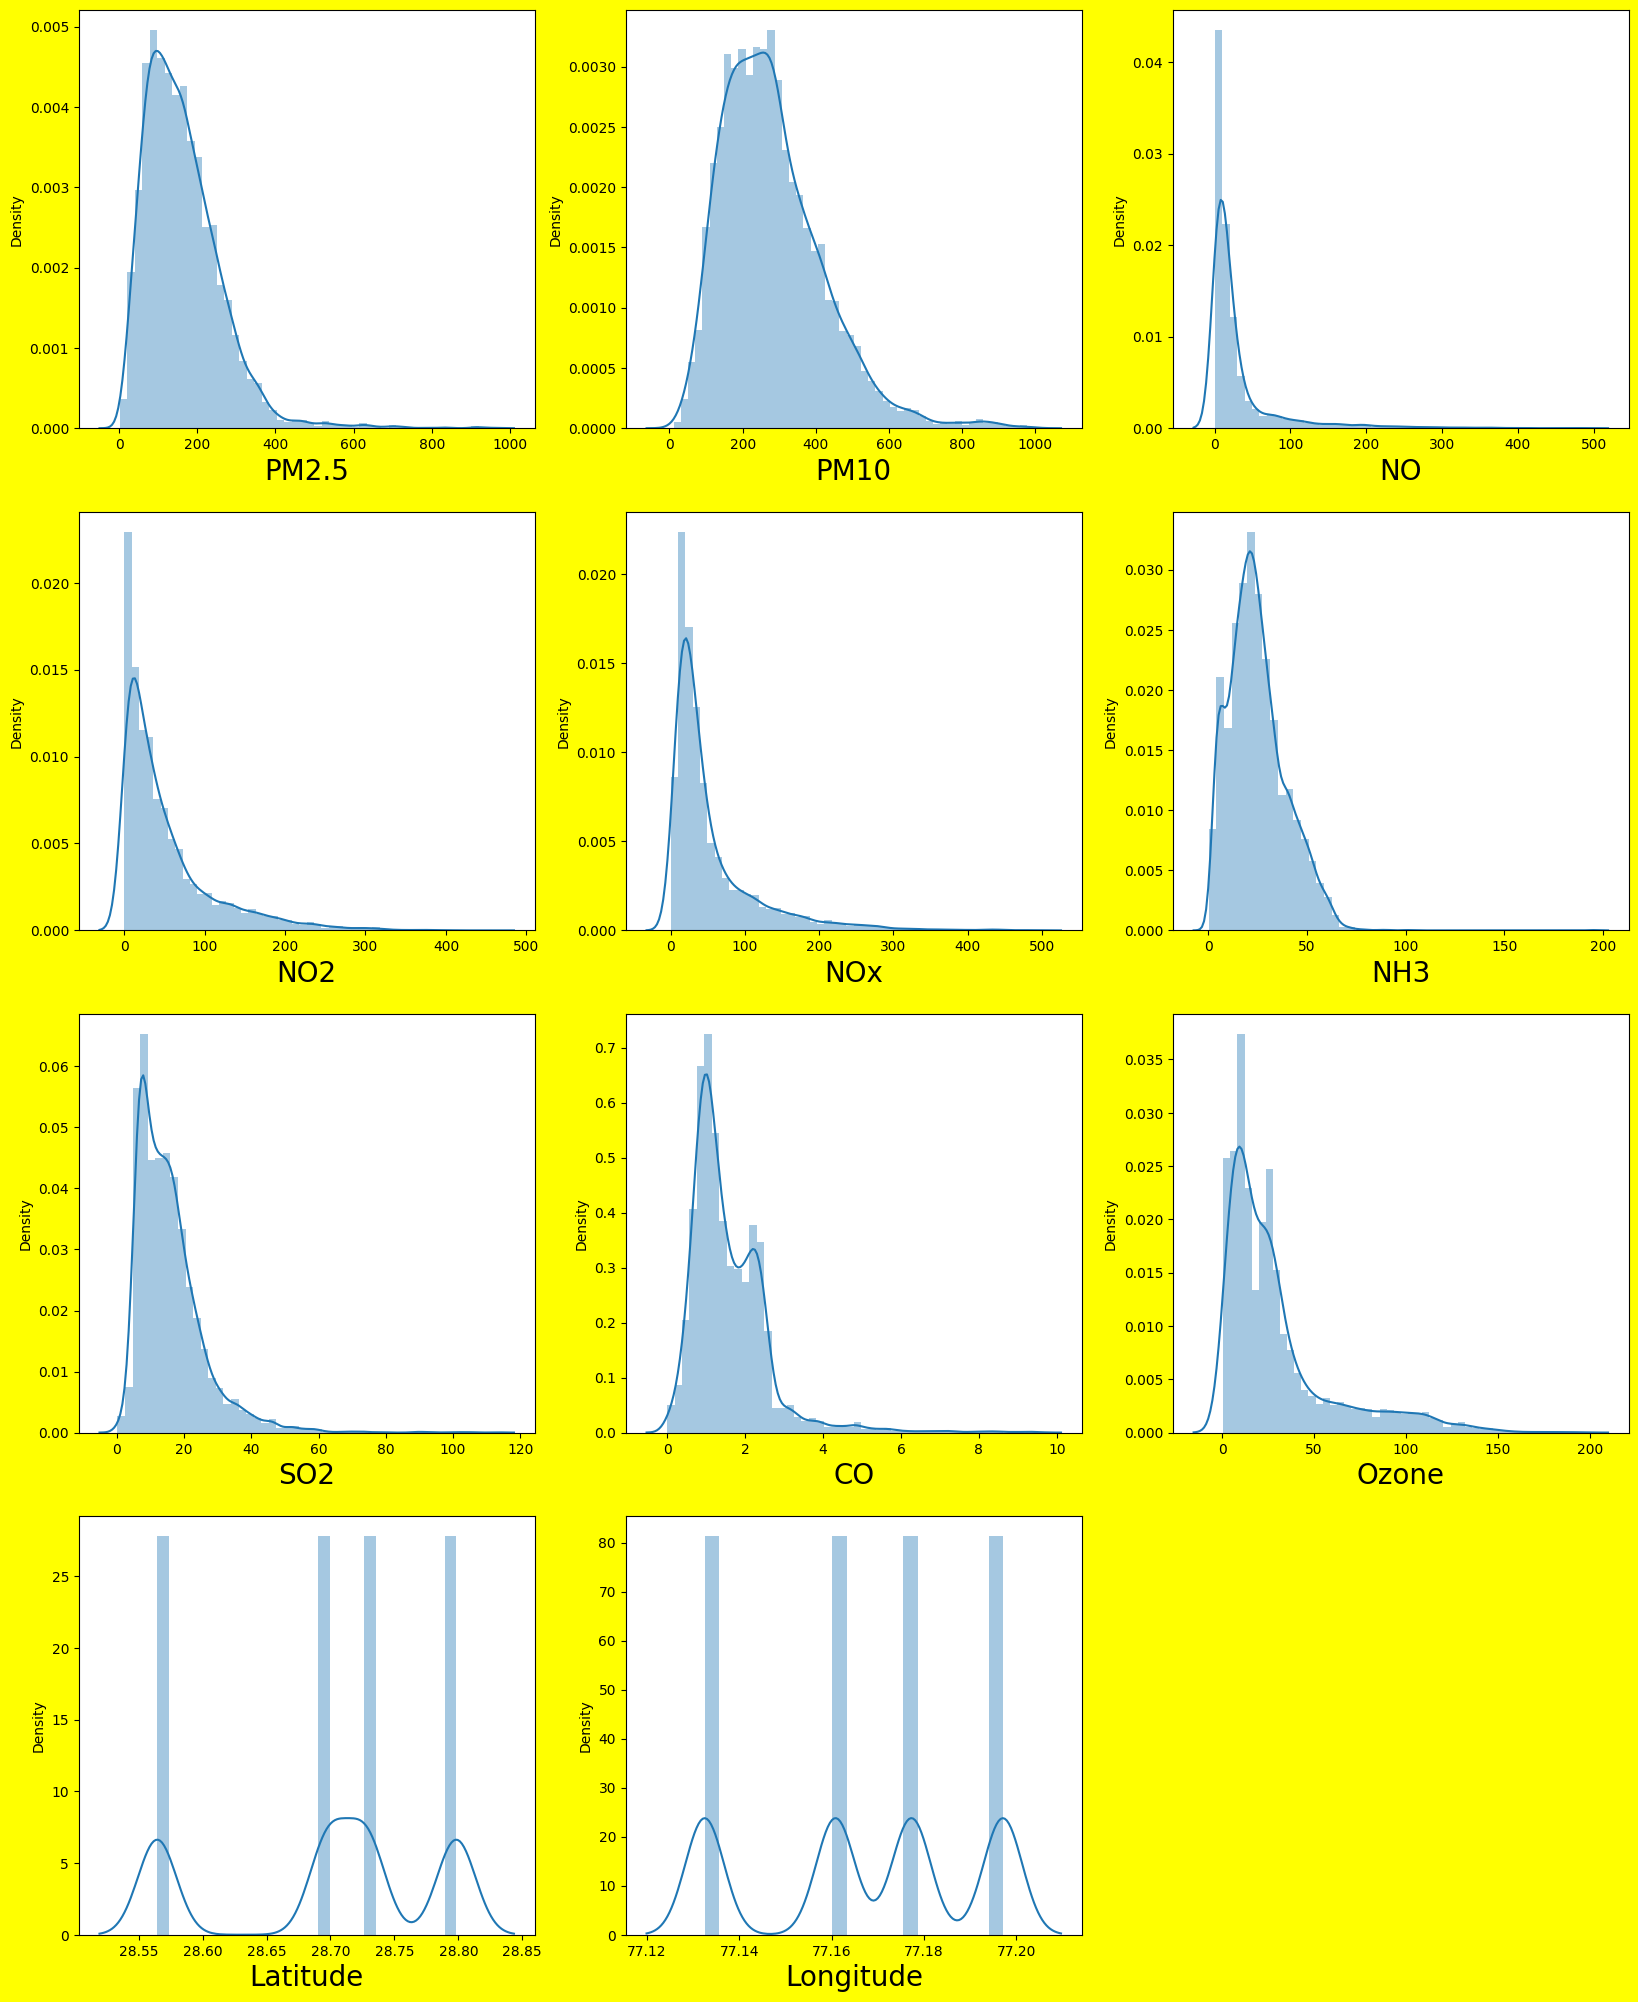

In [ ]:
plt.figure(figsize=(20,25),facecolor="yellow")
plotnumber=1
for column in df_features:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
df_features


,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Latitude,Longitude
0,117.46,191.41,11.95,5.10,17.05,8.330,12.148,2.15,20.140,28.728142,77.197058
1,140.50,185.00,2.22,19.62,12.25,28.820,6.970,1.10,17.430,28.798335,77.132482
2,190.00,266.00,17.72,61.20,47.03,29.500,25.850,1.35,15.280,28.564497,77.177255
3,212.50,309.50,9.62,64.43,74.08,32.320,8.150,0.90,8.050,28.698390,77.160810
4,100.28,168.99,12.89,5.40,18.30,9.720,10.278,2.13,16.860,28.728142,77.197058
...,...,...,...,...,...,...,...,...,...,...,...
5707,250.50,304.00,93.58,145.60,153.47,38.800,35.920,0.60,5.782,28.698390,77.160810
5708,77.73,109.71,18.09,7.54,25.63,14.888,15.110,1.79,22.190,28.728142,77.197058
5709,200.00,233.00,27.50,54.40,51.27,53.330,9.930,1.80,12.570,28.798335,77.132482
5710,99.00,128.00,6.60,25.17,18.73,32.030,15.370,1.28,12.530,28.564497,77.177255


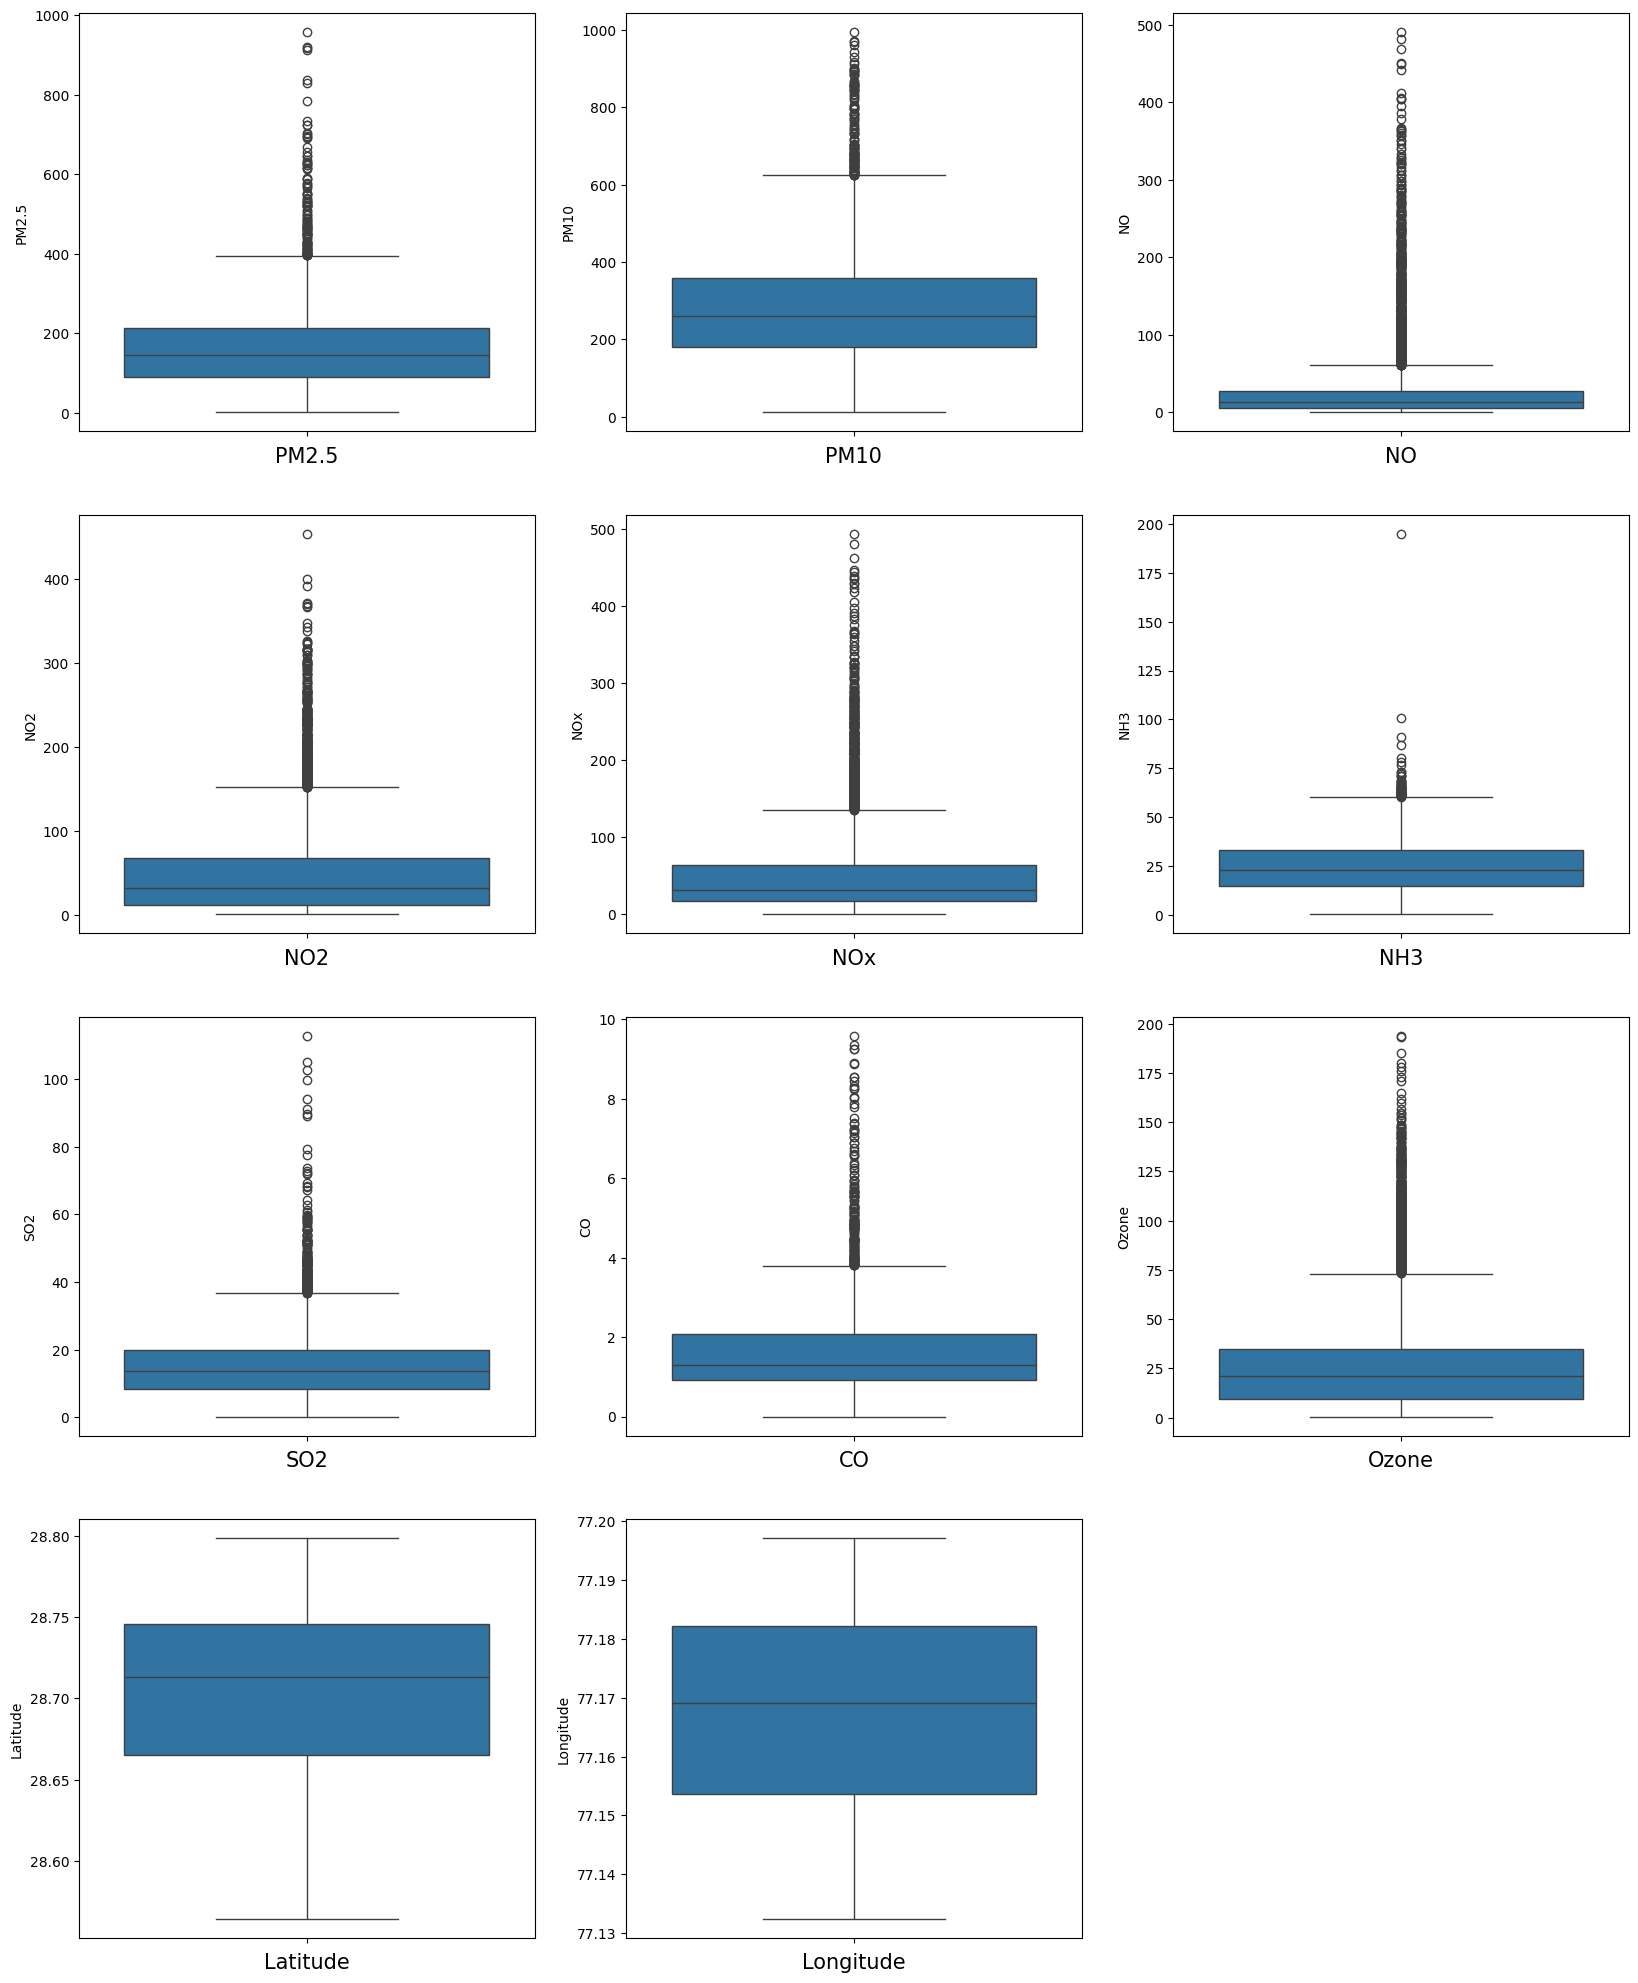

In [ ]:
plt.figure(figsize=(20,25))
graph = 1
for column in df_features:
    if graph<=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [ ]:
def outlier_IQR(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_bridge=df[col].quantile(.25)-(IQR*1.5)
    upper_bridge=df[col].quantile(.75)+(IQR*1.5)
    non_outlier=np.where((df[col]<lower_bridge )|(df[col]>upper_bridge),df[col].median(),df[col])
    df[col]=non_outlier
    sns.boxplot(df[col])

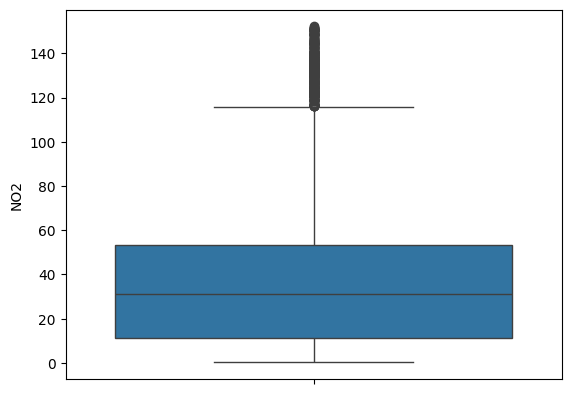

In [ ]:
outlier_IQR(df,'NO2')

In [ ]:
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

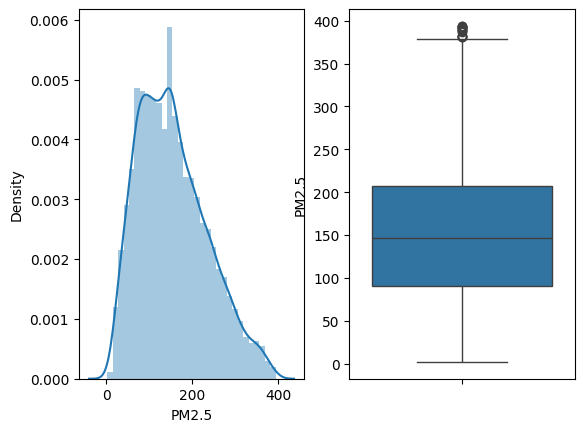

In [ ]:
replace_outlier(df,'PM2.5')

In [ ]:
df.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'SO2', 'CO', 'Ozone', 'Latitude', 'Longitude'],
      dtype='object')

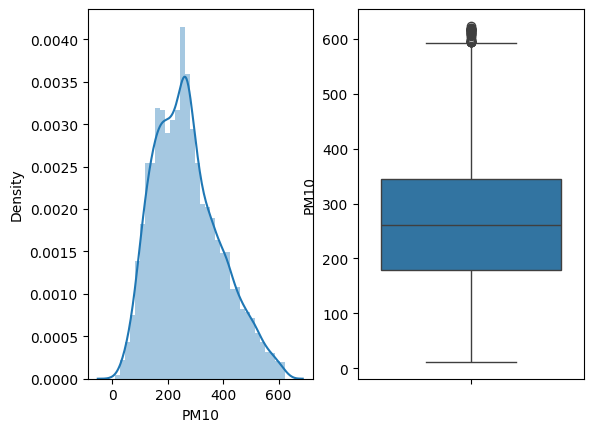

In [ ]:
replace_outlier(df,'PM10')

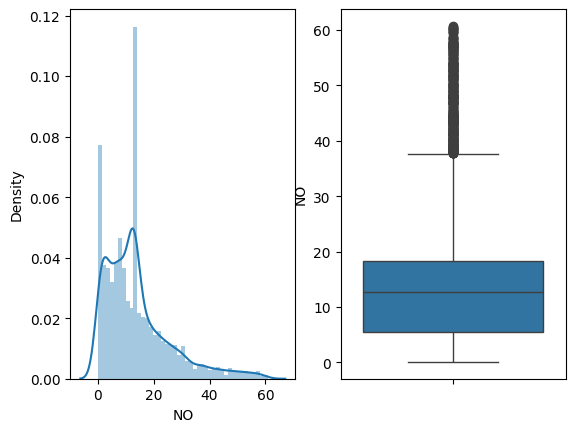

In [ ]:
replace_outlier(df,'NO')

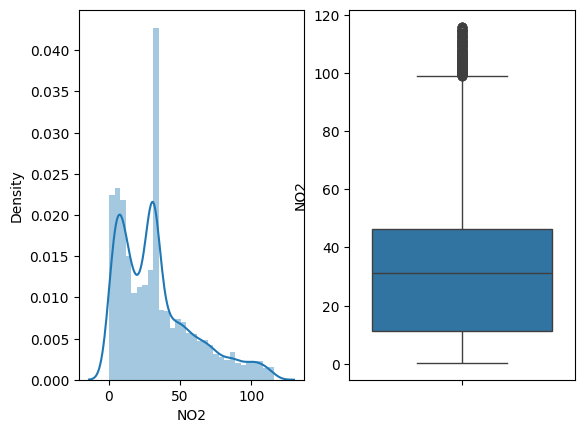

In [ ]:
replace_outlier(df,'NO2')

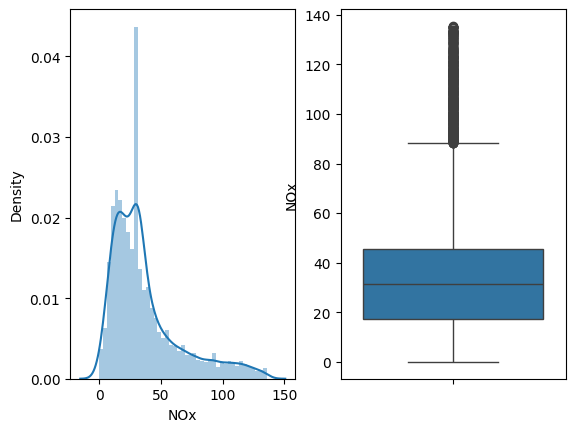

In [ ]:
replace_outlier(df,'NOx')

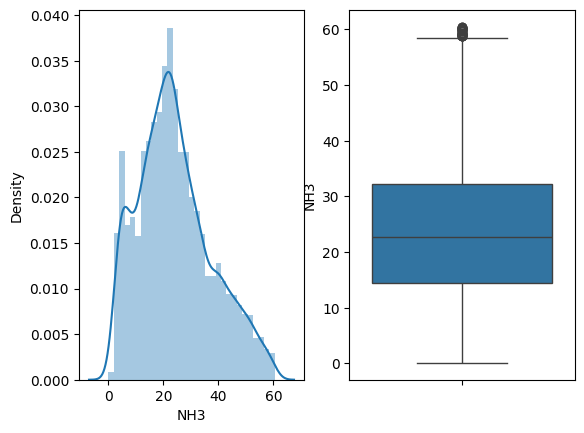

In [ ]:
replace_outlier(df,'NH3')

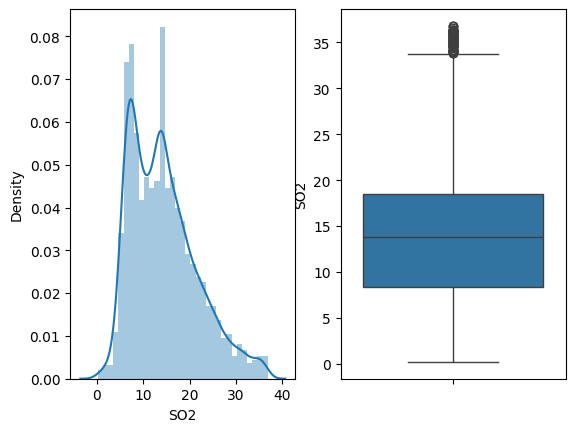

In [ ]:
replace_outlier(df,'SO2')

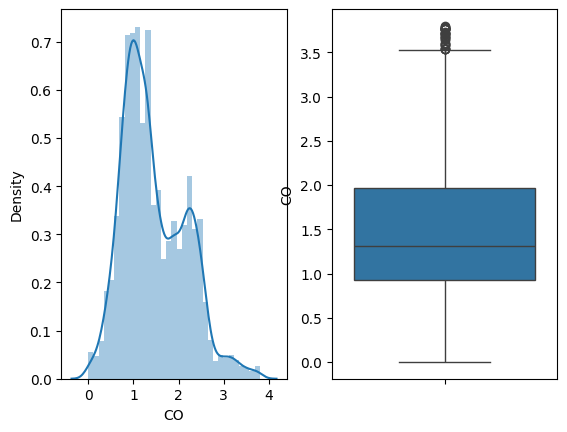

In [ ]:
replace_outlier(df,'CO')

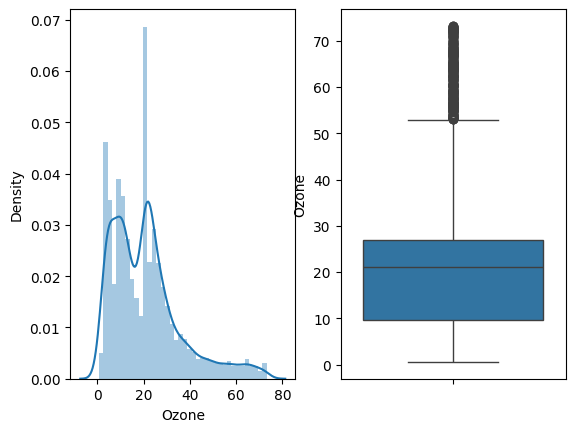

In [ ]:
replace_outlier(df,'Ozone')

In [ ]:
##Pollutant level of PM2.5 > 60 which is not prescribed limit
df[df['PM2.5']>60]

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Latitude,Longitude
0,01-01-2024 00:00,01-01-2024 01:00,117.46,191.41,11.95,5.100,17.05,8.330,12.148,2.15,20.140,28.728142,77.197058
1,01-01-2024 00:00,01-01-2024 01:00,140.50,185.00,2.22,19.620,12.25,28.820,6.970,1.10,17.430,28.798335,77.132482
2,01-01-2024 00:00,01-01-2024 01:00,190.00,266.00,17.72,61.200,47.03,29.500,25.850,1.35,15.280,28.564497,77.177255
3,01-01-2024 00:00,01-01-2024 01:00,212.50,309.50,9.62,64.430,74.08,32.320,8.150,0.90,8.050,28.698390,77.160810
4,01-01-2024 01:00,01-01-2024 02:00,100.28,168.99,12.89,5.400,18.30,9.720,10.278,2.13,16.860,28.728142,77.197058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,31-01-2024 22:00,31-01-2024 23:00,250.50,304.00,12.80,31.285,31.49,38.800,35.920,0.60,5.782,28.698390,77.160810
5708,31-01-2024 23:00,01-02-2024 00:00,77.73,109.71,18.09,7.540,25.63,14.888,15.110,1.79,22.190,28.728142,77.197058
5709,31-01-2024 23:00,01-02-2024 00:00,200.00,233.00,27.50,54.400,51.27,53.330,9.930,1.80,12.570,28.798335,77.132482
5710,31-01-2024 23:00,01-02-2024 00:00,99.00,128.00,6.60,25.170,18.73,32.030,15.370,1.28,12.530,28.564497,77.177255


In [ ]:
len(df)

5712

In [ ]:
len(df[df['PM2.5']>200])

1554

From above it has been observed that out of 5712 observation ,5123 times the level of PM2.5 cross the prescribed limit which is 60.
Even 1554 times the level has cross 200 marks which is alarming and deadly.

In [ ]:
len(df[df['PM10']>100])

5435

In [ ]:
len(df[df['PM10']>200])

3910

In [ ]:
len(df[df['PM10']>300])

2005

It has been clearly visible from above that PM10 coccentration has been above 300ppm for 2005 times obsevation which indicates the level has cross even alarming situation.

In [ ]:
len(df[df['NO']>80])

0

In [ ]:
df['NO'].max()

60.75

The level of NO has not crossed the prescribed limit of 80 and max concentration is 61ppm .so no alarming situation .

In [ ]:
len(df[df['CO']>4])

0

In [ ]:
df['CO'].max()

3.8

CO level is not a problematic till now and it is controlled at many places.

In [ ]:
df['SO2'].max()

36.8

sulphur dioxide is in totally controlled as it has no observation above prescribed limit.

Generating correlation among features

In [ ]:
df_features.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Latitude,Longitude
PM2.5,1.000000,0.902631,0.490692,0.370120,0.524375,0.158923,0.351939,0.419965,-0.275916,-0.230172,0.075655
PM10,0.902631,1.000000,0.501627,0.462668,0.578361,0.069078,0.447236,0.412941,-0.214465,-0.187147,0.182017
NO,0.490692,0.501627,1.000000,0.452427,0.893879,0.076881,0.410549,0.471094,-0.281583,-0.243941,0.091325
NO2,0.370120,0.462668,0.452427,1.000000,0.783062,0.131161,0.498695,-0.006559,-0.179723,-0.110285,-0.204356
NOx,0.524375,0.578361,0.893879,0.783062,1.000000,0.108212,0.522930,0.327718,-0.294685,-0.218023,-0.003140
NH3,0.158923,0.069078,0.076881,0.131161,0.108212,1.000000,-0.084850,0.029066,-0.019455,0.236945,-0.484546
SO2,0.351939,0.447236,0.410549,0.498695,0.522930,-0.084850,1.000000,0.109964,0.002844,-0.309582,0.163096
CO,0.419965,0.412941,0.471094,-0.006559,0.327718,0.029066,0.109964,1.000000,-0.216095,-0.225090,0.322013
Ozone,-0.275916,-0.214465,-0.281583,-0.179723,-0.294685,-0.019455,0.002844,-0.216095,1.000000,-0.000326,-0.025335
Latitude,-0.230172,-0.187147,-0.243941,-0.110285,-0.218023,0.236945,-0.309582,-0.225090,-0.000326,1.000000,-0.489376


<Axes: >

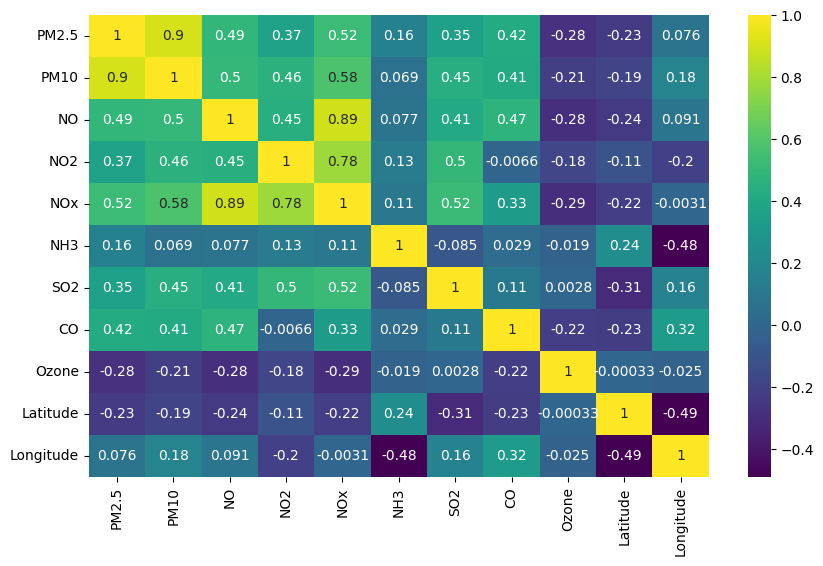

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(df_features.corr(),annot=True,cmap='viridis')

From the above it has been observed that NOx is strongly related to NO and as heat map colour intensity increases from blue to yellowish stronglt the one factor relates with other.

In [ ]:
df.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Latitude,Longitude
0,01-01-2024 00:00,01-01-2024 01:00,117.46,191.41,11.95,5.10,17.05,8.33,12.148,2.15,20.14,28.728142,77.197058
1,01-01-2024 00:00,01-01-2024 01:00,140.50,185.00,2.22,19.62,12.25,28.82,6.970,1.10,17.43,28.798335,77.132482
2,01-01-2024 00:00,01-01-2024 01:00,190.00,266.00,17.72,61.20,47.03,29.50,25.850,1.35,15.28,28.564497,77.177255
3,01-01-2024 00:00,01-01-2024 01:00,212.50,309.50,9.62,64.43,74.08,32.32,8.150,0.90,8.05,28.698390,77.160810
4,01-01-2024 01:00,01-01-2024 02:00,100.28,168.99,12.89,5.40,18.30,9.72,10.278,2.13,16.86,28.728142,77.197058


In [ ]:
datetime_obj = df['From Date']

In [ ]:
datetime_obj = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')

In [ ]:
datetime_obj

0      2024-01-01 00:00:00
1      2024-01-01 00:00:00
2      2024-01-01 00:00:00
3      2024-01-01 00:00:00
4      2024-01-01 01:00:00
               ...        
5707   2024-01-31 22:00:00
5708   2024-01-31 23:00:00
5709   2024-01-31 23:00:00
5710   2024-01-31 23:00:00
5711   2024-01-31 23:00:00
Name: From Date, Length: 5712, dtype: datetime64[ns]

In [ ]:
datetime_obj['y'] = df['PM2.5']

In [88]:
datetime_obj['y'].head()

0    117.46
1    140.50
2    190.00
3    212.50
4    100.28
Name: PM2.5, dtype: float64

In [92]:
df1 = pd.concat([datetime_obj,datetime_obj['y']],axis=1)

In [93]:
df1.head()

,From Date,PM2.5
0,2024-01-01 00:00:00,117.46
1,2024-01-01 00:00:00,140.50
2,2024-01-01 00:00:00,190.00
3,2024-01-01 00:00:00,212.50
4,2024-01-01 01:00:00,100.28


In [97]:
df1 = df1.rename(columns={'From Date':'ds','PM2.5':'y'})
df1.head()

,ds,y
0,2024-01-01 00:00:00,117.46
1,2024-01-01 00:00:00,140.50
2,2024-01-01 00:00:00,190.00
3,2024-01-01 00:00:00,212.50
4,2024-01-01 01:00:00,100.28


In [98]:
from prophet import Prophet

In [99]:
#Training the prophet model

model = Prophet()
model.fit(df1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9u3u6k_f/_5xl4e8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9u3u6k_f/i2s54k84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21685', 'data', 'file=/tmp/tmp9u3u6k_f/_5xl4e8l.json', 'init=/tmp/tmp9u3u6k_f/i2s54k84.json', 'output', 'file=/tmp/tmp9u3u6k_f/prophet_model0ywnd43c/prophet_model-20240609100409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:04:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:04:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [101]:
future = model.make_future_dataframe(periods=365,freq='H')
future.tail()

,ds
1788,2024-03-15 12:00:00
1789,2024-03-15 13:00:00
1790,2024-03-15 14:00:00
1791,2024-03-15 15:00:00
1792,2024-03-15 16:00:00


In [102]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1788,2024-03-15 12:00:00,-83.716642,-194.217123,27.895679
1789,2024-03-15 13:00:00,-86.534730,-193.841070,32.247226
1790,2024-03-15 14:00:00,-92.650635,-203.584029,19.796432
1791,2024-03-15 15:00:00,-99.455569,-211.493643,19.694210
1792,2024-03-15 16:00:00,-102.230204,-215.082572,15.835452


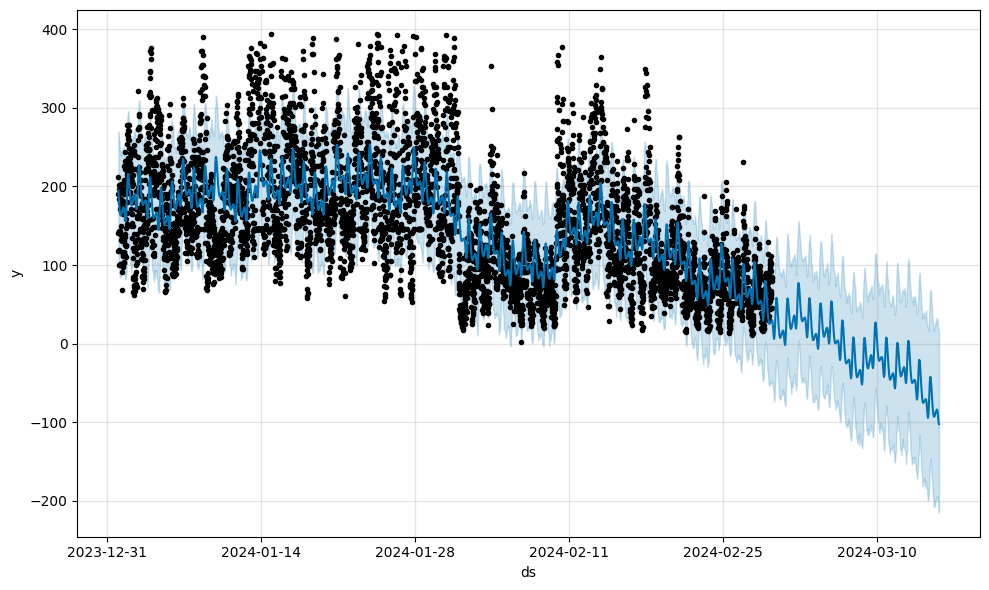

In [103]:
graph1 = model.plot(forecast)

similarly we can forecast for other gases or pollutant.

In [104]:
datetime_obj1['y'] = df['PM10']

In [105]:
df2 = pd.concat([datetime_obj,datetime_obj1['y']],axis=1)

In [106]:
df2.head()

,From Date,PM10
0,2024-01-01 00:00:00,191.41
1,2024-01-01 00:00:00,185.00
2,2024-01-01 00:00:00,266.00
3,2024-01-01 00:00:00,309.50
4,2024-01-01 01:00:00,168.99


In [107]:
df2 = df2.rename(columns={'From Date':'ds','PM10':'y'})
df2.head()

,ds,y
0,2024-01-01 00:00:00,191.41
1,2024-01-01 00:00:00,185.00
2,2024-01-01 00:00:00,266.00
3,2024-01-01 00:00:00,309.50
4,2024-01-01 01:00:00,168.99


In [112]:
model1 = Prophet()
model1.fit(df2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9u3u6k_f/zfnu8xkm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9u3u6k_f/kiq8xnun.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30799', 'data', 'file=/tmp/tmp9u3u6k_f/zfnu8xkm.json', 'init=/tmp/tmp9u3u6k_f/kiq8xnun.json', 'output', 'file=/tmp/tmp9u3u6k_f/prophet_modelb7k2ohem/prophet_model-20240609105012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:50:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [113]:
future = model1.make_future_dataframe(periods=365,freq='H')
future.tail()

,ds
1788,2024-03-15 12:00:00
1789,2024-03-15 13:00:00
1790,2024-03-15 14:00:00
1791,2024-03-15 15:00:00
1792,2024-03-15 16:00:00


In [114]:
forecast = model1.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1788,2024-03-15 12:00:00,-39.916855,-221.965026,134.443448
1789,2024-03-15 13:00:00,-43.218100,-222.577976,139.313595
1790,2024-03-15 14:00:00,-52.203552,-232.409793,132.516657
1791,2024-03-15 15:00:00,-62.437249,-231.342389,118.265976
1792,2024-03-15 16:00:00,-65.994294,-232.109080,114.404942


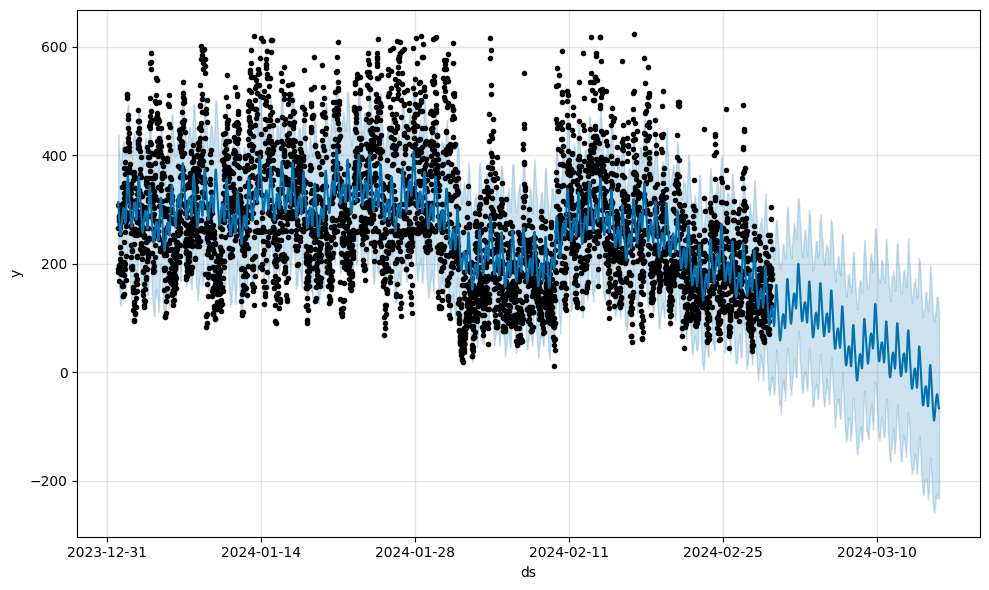

In [115]:
graph2 = model1.plot(forecast)

----------------------Thanks-------------------------------------------